<a href="https://colab.research.google.com/github/somynt/Semester_4/blob/main/22079522FASTERRCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Check CUDA and PyTorch setup status with environment details.
"""

import os
import torch
import subprocess

# Set CUDA launch blocking for debugging purposes
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

print(
    "CUDA_LAUNCH_BLOCKING is set to: "
    f"{os.environ.get('CUDA_LAUNCH_BLOCKING')}"
)

# Print PyTorch version and CUDA availability
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"CUDA version (from torch): {torch.version.cuda}")
    print(f"CUDA device name: {torch.cuda.get_device_name(0)}")
    print(
        "CUDA device capability: "
        f"{torch.cuda.get_device_capability(0)}"
    )

# Print system-level CUDA driver information using nvidia-smi
try:
    result = subprocess.run(
        ["nvidia-smi"],
        check=True,
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        text=True
    )
    print("nvidia-smi output:\n", result.stdout)
except FileNotFoundError:
    print("nvidia-smi not found. Is NVIDIA driver installed?")
except subprocess.CalledProcessError as e:
    print(f"Error running nvidia-smi: {e.stderr}")


CUDA_LAUNCH_BLOCKING is set to: 1
PyTorch version: 2.6.0+cu124
CUDA available: True
CUDA version (from torch): 12.4
CUDA device name: NVIDIA A100-SXM4-40GB
CUDA device capability: (8, 0)
nvidia-smi output:
 Wed Jun 25 09:19:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0        

In [ ]:
"""
Mount Google Drive in a Colab environment to access files.
"""

from google.colab import drive

# Mount Google Drive to access content at /content/drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Install required packages
!pip install torch torchvision torchaudio optuna \
    pycocotools requests

In [ ]:
# Unzip dataset into the 'coco2017/images' folder
#!unzip "/content/drive/MyDrive/RM_Segmentation_Assignment_dataset.zip" \
    -d "/content/drive/MyDrive/coco2017/"

Archive:  /content/drive/MyDrive/RM_Segmentation_Assignment_dataset.zip
replace /content/drive/MyDrive/coco2017/test-30/000000001751.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
"""
Mount Google Drive and set up directory paths for a COCO-style dataset.
"""

from google.colab import drive
import os
import json
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
from collections import defaultdict
import pandas as pd

print("Mounting Google Drive...")
drive.mount('/content/drive')
print("Google Drive mounted.")

# Path for storing original COCO annotations in Colab
COLAB_ORIGINAL_COCO_ANNOTATIONS_DIR = \
    '/content/original_coco_annotations'

# Create the COCO annotations directory in Colab
!mkdir -p "$COLAB_ORIGINAL_COCO_ANNOTATIONS_DIR"

# Custom dataset paths (update as needed)
YOUR_CUSTOM_TRAIN_IMAGES_DIR = \
    '/content/drive/MyDrive/coco2017/train-300/data'
YOUR_CUSTOM_TRAIN_ANNOTATION_FILE = \
    '/content/drive/MyDrive/coco2017/train-300/labels.json'
YOUR_CUSTOM_VAL_IMAGES_DIR = \
    '/content/drive/MyDrive/coco2017/validation-300/data'
YOUR_CUSTOM_VAL_ANNOTATION_FILE = \
    '/content/drive/MyDrive/coco2017/validation-300/labels.json'
YOUR_CUSTOM_TEST_IMAGES_DIR = \
    '/content/drive/MyDrive/coco2017/test-30/data'  # test folder

# Print paths for confirmation
print(
    "\nColab COCO Annotations will be at:"
    f" {COLAB_ORIGINAL_COCO_ANNOTATIONS_DIR}"
)
print(f"Custom Train Images: {YOUR_CUSTOM_TRAIN_IMAGES_DIR}")
print(f"Custom Val Images: {YOUR_CUSTOM_VAL_IMAGES_DIR}")
print(f"Train Annotations: {YOUR_CUSTOM_TRAIN_ANNOTATION_FILE}")
print(f"Val Annotations: {YOUR_CUSTOM_VAL_ANNOTATION_FILE}")
print(f"Test Images: {YOUR_CUSTOM_TEST_IMAGES_DIR}")

# Change working directory to Colab root
%cd /content/


Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive mounted.

Colab COCO Annotations will be at: /content/original_coco_annotations
Custom Train Images: /content/drive/MyDrive/coco2017/train-300/data
Custom Val Images: /content/drive/MyDrive/coco2017/validation-300/data
Train Annotations: /content/drive/MyDrive/coco2017/train-300/labels.json
Val Annotations: /content/drive/MyDrive/coco2017/validation-300/labels.json
Test Images: /content/drive/MyDrive/coco2017/test-30/data
/content


 Loading COCO dataset objects...
loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
 Training dataset loaded: 300 images
loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
 Validation dataset loaded: 300 images
ℹ  Test annotation file not found: /content/drive/MyDrive/coco2017/test-30/labels.json

 Starting Comprehensive Dataset Analysis...

EXPLORATORY DATA ANALYSIS: TRAINING SET DATASET

 DATASET OVERVIEW
─────────────────────────
Total Images: 300

 TARGET CLASS ANALYSIS
──────────────────────────────
Total Target Annotations: 2,438

Per-Class Distribution:
  • person              :  1,350 ( 55.4%)
  • car                 :  1,061 ( 43.5%)
  • dog                 :     14 (  0.6%)
  • cake                :     13 (  0.5%)


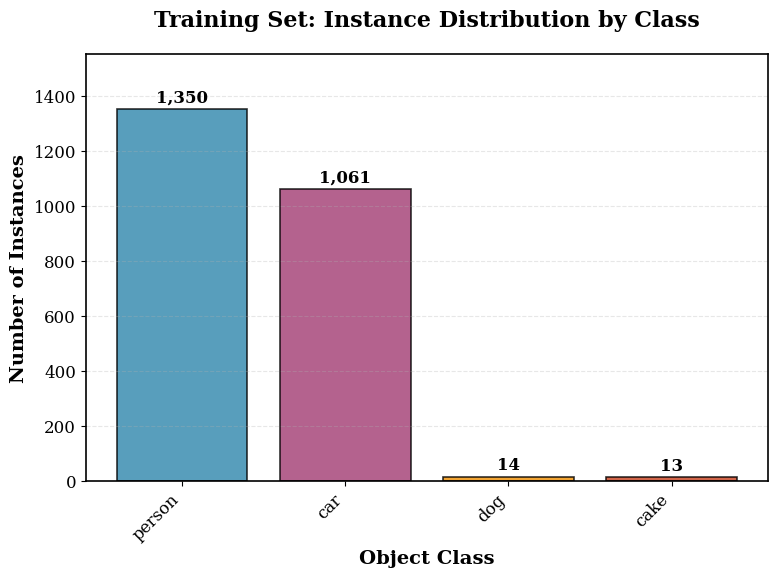


  IMAGE-LEVEL STATISTICS
────────────────────────────
Images with Target Objects: 0 (0.0%)
Single Instance Images: 0
Multi-Instance Images: 0
Max Instances per Image: 0

📏 BOUNDING BOX ANALYSIS
──────────────────────────
Area Statistics (pixels²):
  • person              : Min=       4, Max=   232,335, Mean=  10,599 (±25,643)
  • car                 : Min=      16, Max=   327,731, Mean=   6,768 (±23,583)
  • dog                 : Min=     136, Max=    82,494, Mean=  16,489 (±26,257)
  • cake                : Min=     378, Max=   139,836, Mean=  12,136 (±36,899)


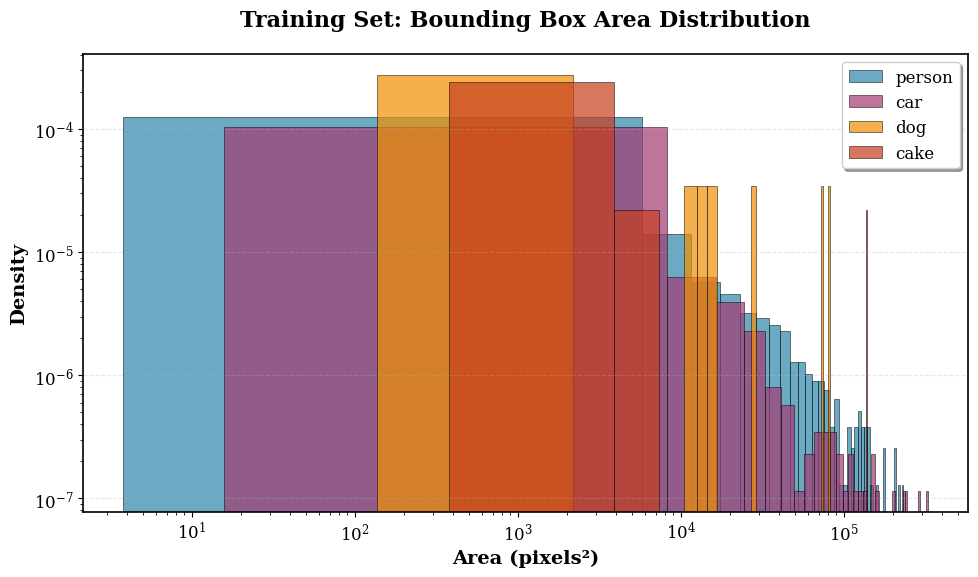


Aspect Ratio Statistics (Width/Height):
  • person              : Min= 0.10, Max=25.29, Mean= 0.66 (±1.15)
  • car                 : Min= 0.13, Max=20.75, Mean= 1.76 (±1.30)
  • dog                 : Min= 0.61, Max= 4.64, Mean= 1.39 (±0.98)
  • cake                : Min= 0.84, Max= 3.20, Mean= 1.61 (±0.73)


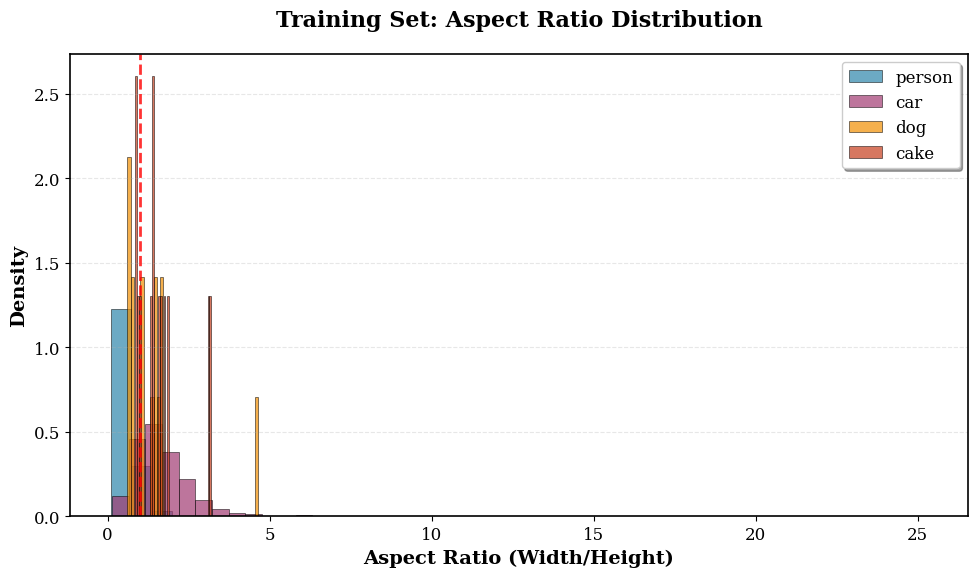


  IMAGE DIMENSIONS ANALYSIS
────────────────────────────────
Width Statistics (pixels):
  Min: 333, Max: 640, Mean: 595 (±81)
Height Statistics (pixels):
  Min: 270, Max: 640, Mean: 475 (±88)


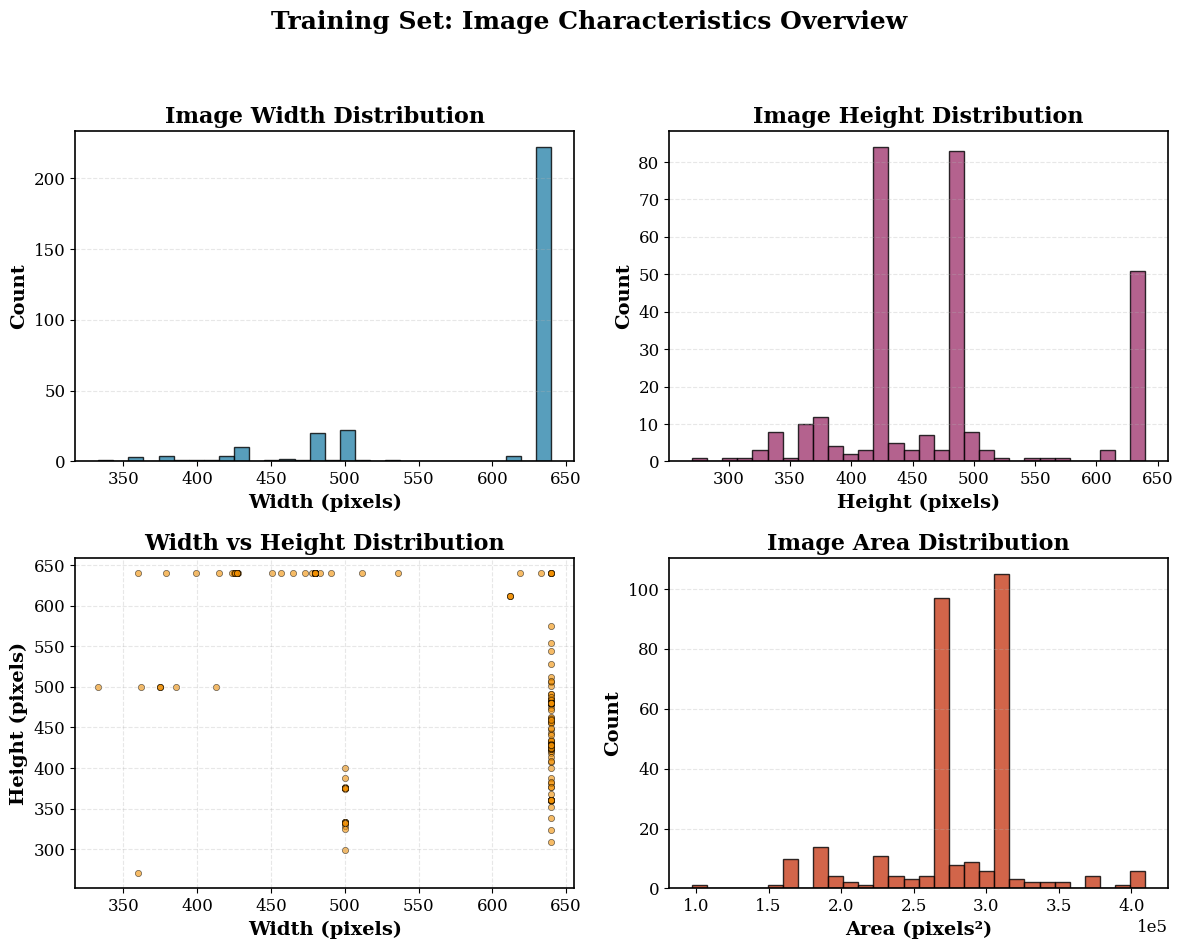


 EDA COMPLETED FOR TRAINING SET DATASET

EXPLORATORY DATA ANALYSIS: VALIDATION SET DATASET

 DATASET OVERVIEW
─────────────────────────
Total Images: 300

 TARGET CLASS ANALYSIS
──────────────────────────────
Total Target Annotations: 2,079

Per-Class Distribution:
  • person              :  1,191 ( 57.3%)
  • car                 :    861 ( 41.4%)
  • dog                 :      9 (  0.4%)
  • cake                :     18 (  0.9%)


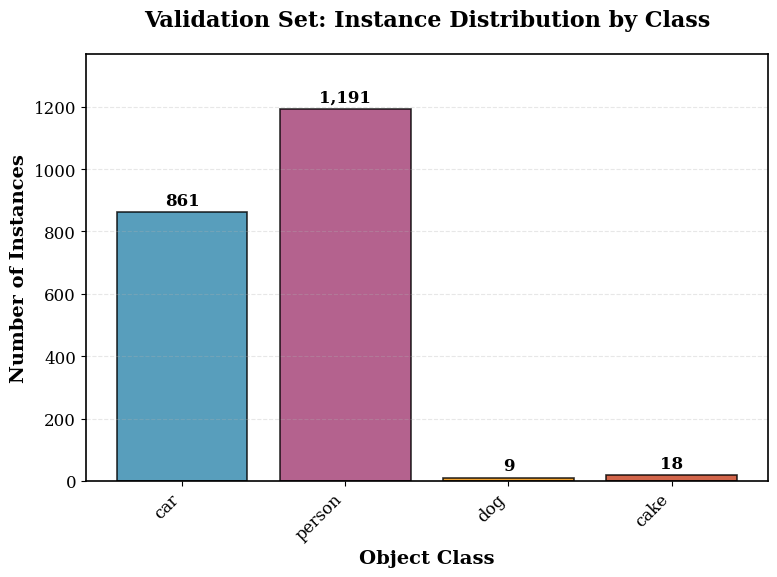


  IMAGE-LEVEL STATISTICS
────────────────────────────
Images with Target Objects: 0 (0.0%)
Single Instance Images: 0
Multi-Instance Images: 0
Max Instances per Image: 0

📏 BOUNDING BOX ANALYSIS
──────────────────────────
Area Statistics (pixels²):
  • person              : Min=       9, Max=   295,218, Mean=  13,161 (±30,262)
  • car                 : Min=      17, Max=   284,575, Mean=   8,013 (±25,845)
  • dog                 : Min=   6,909, Max=   109,172, Mean=  30,482 (±29,840)
  • cake                : Min=     552, Max=    95,295, Mean=  15,270 (±25,175)


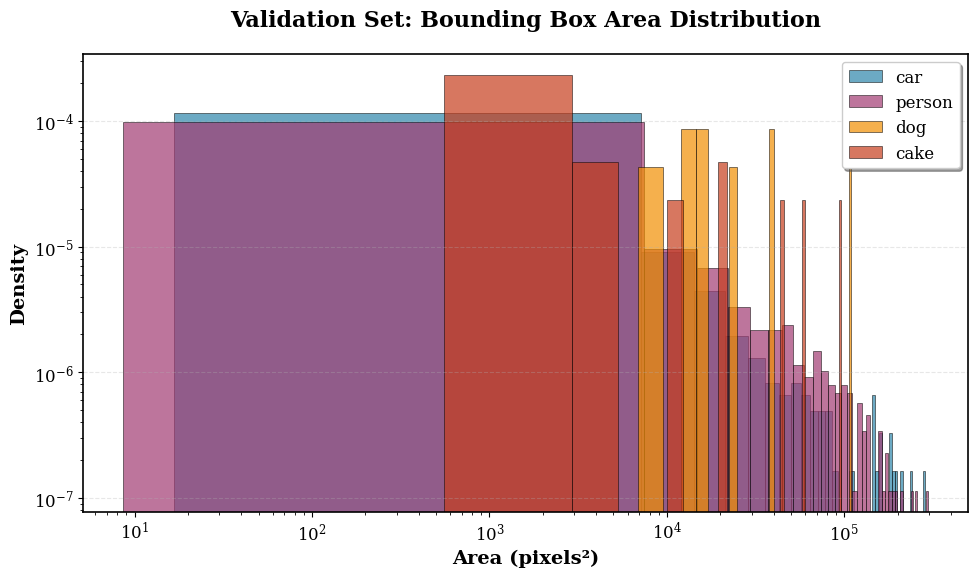


Aspect Ratio Statistics (Width/Height):
  • person              : Min= 0.11, Max=13.00, Mean= 0.68 (±0.81)
  • car                 : Min= 0.17, Max=29.29, Mean= 1.69 (±1.43)
  • dog                 : Min= 0.57, Max= 1.05, Mean= 0.86 (±0.15)
  • cake                : Min= 0.93, Max= 2.78, Mean= 1.40 (±0.45)


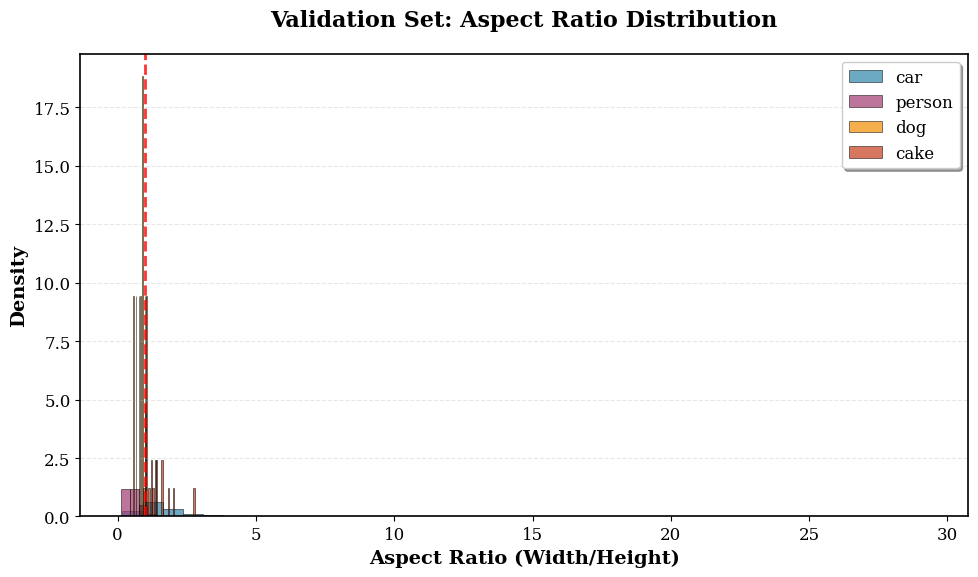


  IMAGE DIMENSIONS ANALYSIS
────────────────────────────────
Width Statistics (pixels):
  Min: 299, Max: 640, Mean: 592 (±84)
Height Statistics (pixels):
  Min: 246, Max: 640, Mean: 483 (±89)


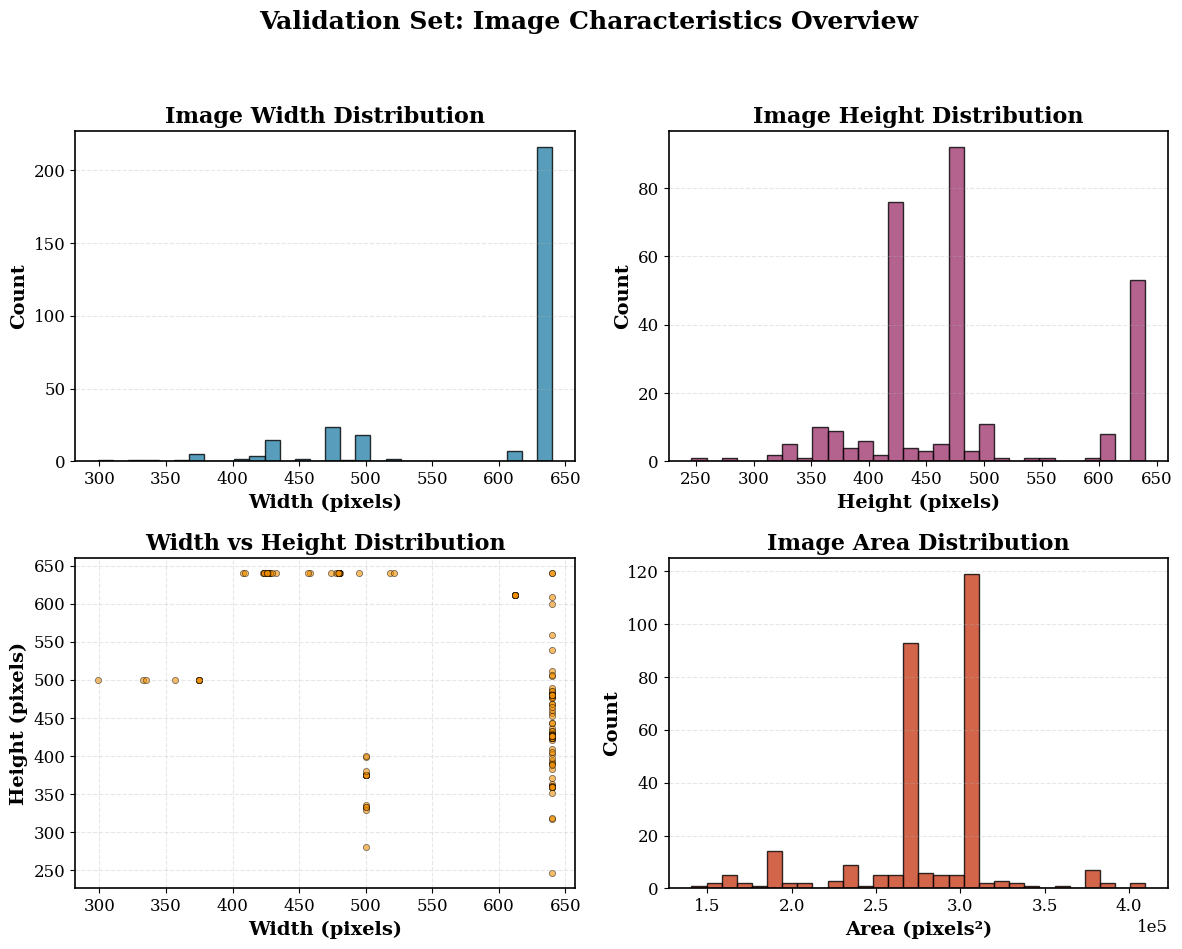


 EDA COMPLETED FOR VALIDATION SET DATASET

 Dataset Analysis Complete!


In [ ]:
def perform_eda(coco_obj, dataset_name):
    """
    Performs comprehensive Exploratory Data Analysis on the given COCO dataset object.
    Generates publication-ready visualizations optimized for A4 double-column format.

    Args:
        coco_obj: COCO dataset object
        dataset_name (str): Name of the dataset for titles and labels
    """
    if coco_obj is None:
        print(f"  Skipping EDA for {dataset_name} as COCO object is not loaded.")
        return

    # Set global matplotlib parameters for publication quality
    plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 16,
        'axes.labelsize': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12,
        'figure.titlesize': 18,
        'font.family': 'serif',
        'axes.linewidth': 1.2,
        'grid.linewidth': 0.8,
        'lines.linewidth': 2
    })

    print(f"\n{'='*60}")
    print(f"EXPLORATORY DATA ANALYSIS: {dataset_name.upper()} DATASET")
    print(f"{'='*60}")

    # 1. Dataset Overview
    total_images = len(coco_obj.imgs)
    print(f"\n DATASET OVERVIEW")
    print(f"{'─'*25}")
    print(f"Total Images: {total_images:,}")

    # 2. Target Class Analysis
    print(f"\n TARGET CLASS ANALYSIS")
    print(f"{'─'*30}")

    cat_ids = coco_obj.getCatIds(catNms=TARGET_CLASSES)
    if not cat_ids:
        print(f" No target categories found in {dataset_name}")
        return

    # Count annotations per category
    anns_per_cat = defaultdict(int)
    total_annotations = 0

    for ann in coco_obj.anns.values():
        if ann['category_id'] in cat_ids:
            cat_name = coco_obj.loadCats([ann['category_id']])[0]['name']
            anns_per_cat[cat_name] += 1
            total_annotations += 1

    # Display annotation counts
    print(f"Total Target Annotations: {total_annotations:,}")
    print("\nPer-Class Distribution:")
    for cat_name in TARGET_CLASSES:
        count = anns_per_cat[cat_name]
        percentage = (count / total_annotations * 100) if total_annotations > 0 else 0
        print(f"  • {cat_name:<20}: {count:>6,} ({percentage:>5.1f}%)")

    # Plot 1: Instance Count per Class
    if anns_per_cat:
        fig, ax = plt.subplots(figsize=(8, 6))
        bars = ax.bar(anns_per_cat.keys(), anns_per_cat.values(),
                     color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D'],
                     edgecolor='black', linewidth=1.2, alpha=0.8)

        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + max(anns_per_cat.values())*0.01,
                   f'{int(height):,}', ha='center', va='bottom', fontweight='bold', fontsize=12)

        ax.set_title(f'{dataset_name}: Instance Distribution by Class',
                    fontweight='bold', pad=20)
        ax.set_xlabel('Object Class', fontweight='bold')
        ax.set_ylabel('Number of Instances', fontweight='bold')
        ax.grid(axis='y', alpha=0.3, linestyle='--')
        ax.set_ylim(0, max(anns_per_cat.values()) * 1.15)

        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    # 3. Image-Level Statistics
    print(f"\n  IMAGE-LEVEL STATISTICS")
    print(f"{'─'*28}")

    imgs_with_target_anns = coco_obj.getImgIds(catIds=cat_ids)
    images_with_targets = len(imgs_with_target_anns)
    coverage_percentage = (images_with_targets / total_images * 100) if total_images > 0 else 0

    print(f"Images with Target Objects: {images_with_targets:,} ({coverage_percentage:.1f}%)")

    # Analyze single vs multiple instances
    single_instance_images = 0
    multi_instance_images = 0
    max_instances_per_image = 0

    for img_id in imgs_with_target_anns:
        ann_ids = coco_obj.getAnnIds(imgIds=img_id, catIds=cat_ids)
        num_instances = len(ann_ids)
        max_instances_per_image = max(max_instances_per_image, num_instances)

        if num_instances == 1:
            single_instance_images += 1
        elif num_instances > 1:
            multi_instance_images += 1

    print(f"Single Instance Images: {single_instance_images:,}")
    print(f"Multi-Instance Images: {multi_instance_images:,}")
    print(f"Max Instances per Image: {max_instances_per_image}")

    # 4. Bounding Box Area Analysis
    print(f"\n📏 BOUNDING BOX ANALYSIS")
    print(f"{'─'*26}")

    bbox_areas = defaultdict(list)
    bbox_aspect_ratios = defaultdict(list)

    for ann in coco_obj.anns.values():
        if ann['category_id'] in cat_ids:
            cat_name = coco_obj.loadCats([ann['category_id']])[0]['name']
            area = ann['area']
            bbox_areas[cat_name].append(area)

            # Calculate aspect ratio
            x, y, w, h = ann['bbox']
            if h > 0:
                bbox_aspect_ratios[cat_name].append(w / h)

    # Display area statistics
    print("Area Statistics (pixels²):")
    for cat_name in TARGET_CLASSES:
        areas = bbox_areas[cat_name]
        if areas:
            min_area, max_area, mean_area = np.min(areas), np.max(areas), np.mean(areas)
            std_area = np.std(areas)
            print(f"  • {cat_name:<20}: Min={min_area:>8,.0f}, Max={max_area:>10,.0f}, "
                  f"Mean={mean_area:>8,.0f} (±{std_area:>6,.0f})")

    # Plot 2: Area Distribution
    if bbox_areas:
        fig, ax = plt.subplots(figsize=(10, 6))
        colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

        for i, (cat_name, areas) in enumerate(bbox_areas.items()):
            if areas:
                ax.hist(areas, bins=40, alpha=0.7, label=cat_name,
                       color=colors[i % len(colors)], density=True, edgecolor='black', linewidth=0.5)

        ax.set_title(f'{dataset_name}: Bounding Box Area Distribution',
                    fontweight='bold', pad=20)
        ax.set_xlabel('Area (pixels²)', fontweight='bold')
        ax.set_ylabel('Density', fontweight='bold')
        ax.legend(frameon=True, fancybox=True, shadow=True)
        ax.grid(axis='y', alpha=0.3, linestyle='--')
        ax.set_yscale('log')
        ax.set_xscale('log')
        plt.tight_layout()
        plt.show()

    # Display aspect ratio statistics
    print("\nAspect Ratio Statistics (Width/Height):")
    for cat_name in TARGET_CLASSES:
        ratios = bbox_aspect_ratios[cat_name]
        if ratios:
            min_ar, max_ar, mean_ar = np.min(ratios), np.max(ratios), np.mean(ratios)
            std_ar = np.std(ratios)
            print(f"  • {cat_name:<20}: Min={min_ar:>5.2f}, Max={max_ar:>5.2f}, "
                  f"Mean={mean_ar:>5.2f} (±{std_ar:>4.2f})")

    # Plot 3: Aspect Ratio Distribution
    if bbox_aspect_ratios:
        fig, ax = plt.subplots(figsize=(10, 6))

        for i, (cat_name, ratios) in enumerate(bbox_aspect_ratios.items()):
            if ratios:
                ax.hist(ratios, bins=40, alpha=0.7, label=cat_name,
                       color=colors[i % len(colors)], density=True, edgecolor='black', linewidth=0.5)

        ax.set_title(f'{dataset_name}: Aspect Ratio Distribution',
                    fontweight='bold', pad=20)
        ax.set_xlabel('Aspect Ratio (Width/Height)', fontweight='bold')
        ax.set_ylabel('Density', fontweight='bold')
        ax.legend(frameon=True, fancybox=True, shadow=True)
        ax.grid(axis='y', alpha=0.3, linestyle='--')
        ax.axvline(x=1, color='red', linestyle='--', alpha=0.8, linewidth=2, label='Square (AR=1)')
        plt.tight_layout()
        plt.show()

    # 5. Image Dimensions Analysis
    print(f"\n  IMAGE DIMENSIONS ANALYSIS")
    print(f"{'─'*32}")

    img_widths = []
    img_heights = []
    img_areas = []

    for img_id in coco_obj.imgs:
        img_info = coco_obj.imgs[img_id]
        width, height = img_info['width'], img_info['height']
        img_widths.append(width)
        img_heights.append(height)
        img_areas.append(width * height)

    if img_widths and img_heights:
        # Display dimension statistics
        print(f"Width Statistics (pixels):")
        print(f"  Min: {np.min(img_widths):,}, Max: {np.max(img_widths):,}, "
              f"Mean: {np.mean(img_widths):,.0f} (±{np.std(img_widths):,.0f})")
        print(f"Height Statistics (pixels):")
        print(f"  Min: {np.min(img_heights):,}, Max: {np.max(img_heights):,}, "
              f"Mean: {np.mean(img_heights):,.0f} (±{np.std(img_heights):,.0f})")

        # Plot 4: Image Dimensions
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

        # Width distribution
        ax1.hist(img_widths, bins=30, color='#2E86AB', alpha=0.8, edgecolor='black', linewidth=1)
        ax1.set_title('Image Width Distribution', fontweight='bold')
        ax1.set_xlabel('Width (pixels)', fontweight='bold')
        ax1.set_ylabel('Count', fontweight='bold')
        ax1.grid(axis='y', alpha=0.3, linestyle='--')

        # Height distribution
        ax2.hist(img_heights, bins=30, color='#A23B72', alpha=0.8, edgecolor='black', linewidth=1)
        ax2.set_title('Image Height Distribution', fontweight='bold')
        ax2.set_xlabel('Height (pixels)', fontweight='bold')
        ax2.set_ylabel('Count', fontweight='bold')
        ax2.grid(axis='y', alpha=0.3, linestyle='--')

        # Scatter plot: Width vs Height
        ax3.scatter(img_widths, img_heights, alpha=0.6, color='#F18F01', s=20, edgecolors='black', linewidth=0.5)
        ax3.set_title('Width vs Height Distribution', fontweight='bold')
        ax3.set_xlabel('Width (pixels)', fontweight='bold')
        ax3.set_ylabel('Height (pixels)', fontweight='bold')
        ax3.grid(True, alpha=0.3, linestyle='--')

        # Image area distribution
        ax4.hist(img_areas, bins=30, color='#C73E1D', alpha=0.8, edgecolor='black', linewidth=1)
        ax4.set_title('Image Area Distribution', fontweight='bold')
        ax4.set_xlabel('Area (pixels²)', fontweight='bold')
        ax4.set_ylabel('Count', fontweight='bold')
        ax4.grid(axis='y', alpha=0.3, linestyle='--')
        ax4.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))

        plt.suptitle(f'{dataset_name}: Image Characteristics Overview',
                    fontsize=18, fontweight='bold', y=0.98)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    print(f"\n{'='*60}")
    print(f" EDA COMPLETED FOR {dataset_name.upper()} DATASET")
    print(f"{'='*60}")


# Define target classes
TARGET_CLASSES = ['person', 'car', 'dog', 'cake']

# Load COCO dataset objects
print(" Loading COCO dataset objects...")

try:
    # Load training dataset
    if os.path.exists(YOUR_CUSTOM_TRAIN_ANNOTATION_FILE):
        custom_train_coco = COCO(YOUR_CUSTOM_TRAIN_ANNOTATION_FILE)
        print(f" Training dataset loaded: {len(custom_train_coco.imgs)} images")
    else:
        print(f" Training annotation file not found: {YOUR_CUSTOM_TRAIN_ANNOTATION_FILE}")
        custom_train_coco = None

    # Load validation dataset
    if os.path.exists(YOUR_CUSTOM_VAL_ANNOTATION_FILE):
        custom_val_coco = COCO(YOUR_CUSTOM_VAL_ANNOTATION_FILE)
        print(f" Validation dataset loaded: {len(custom_val_coco.imgs)} images")
    else:
        print(f" Validation annotation file not found: {YOUR_CUSTOM_VAL_ANNOTATION_FILE}")
        custom_val_coco = None

    # Check for test dataset (if it exists)
    YOUR_CUSTOM_TEST_ANNOTATION_FILE = '/content/drive/MyDrive/coco2017/test-30/labels.json'
    if os.path.exists(YOUR_CUSTOM_TEST_ANNOTATION_FILE):
        custom_test_coco = COCO(YOUR_CUSTOM_TEST_ANNOTATION_FILE)
        print(f" Test dataset loaded: {len(custom_test_coco.imgs)} images")
    else:
        print(f"ℹ  Test annotation file not found: {YOUR_CUSTOM_TEST_ANNOTATION_FILE}")
        custom_test_coco = None

except Exception as e:
    print(f"Error loading datasets: {str(e)}")
    custom_train_coco = custom_val_coco = custom_test_coco = None

# Execute EDA with enhanced formatting
print("\n Starting Comprehensive Dataset Analysis...")
print("="*80)

# Perform EDA on available datasets
if custom_train_coco:
    perform_eda(custom_train_coco, "Training Set")

if custom_val_coco:
    perform_eda(custom_val_coco, "Validation Set")

if custom_test_coco:
    perform_eda(custom_test_coco, "Test Set")

if not any([custom_train_coco, custom_val_coco, custom_test_coco]):
    print(" No datasets could be loaded. Please check your file paths.")
else:
    print("\n Dataset Analysis Complete!")
    print("="*80)

In [ ]:
# ====================================================
# Cell 4: Visualize Custom Dataset Annotations
# ====================================================

# === Imports ===
import random  # For selecting random images
import matplotlib.pyplot as plt  # For plotting
import matplotlib.patches as patches  # For drawing bounding boxes
from PIL import Image  # For loading images
import os  # For file path handling

# === Visualization Function Definition ===
def visualize_coco_annotations(coco_obj, image_dir, dataset_name, num_images_to_show=3):
    """
    Visualizes random images and their bounding box annotations from a COCO dataset.
    Handles cases where the COCO object might be None (e.g., for unlabeled test sets).
    """

    # --- Section 1: Safety Check ---
    if coco_obj is None:
        print(f"\n--- Skipping Visualization for {dataset_name} as COCO object is not loaded or is invalid. ---")
        return

    print(f"\n--- Visualizing {num_images_to_show} Random Images from {dataset_name} Dataset ---")

    # --- Section 2: Get Image IDs with Target Class Annotations ---
    target_cat_ids_in_coco_obj = [NEW_CATEGORY_MAP[name] for name in TARGET_CLASSES if name in NEW_CATEGORY_MAP]

    if not target_cat_ids_in_coco_obj:
        print(f"Warning: No target categories found in {dataset_name} COCO object. Cannot visualize annotations.")
        img_ids_with_annotations = list(coco_obj.imgs.keys())
    else:
        img_ids_with_annotations = coco_obj.getImgIds(catIds=target_cat_ids_in_coco_obj)
        if not img_ids_with_annotations:
            print(f"No images with target class annotations found in {dataset_name}. Visualizing random images (without annotations if none exist).")
            img_ids_with_annotations = list(coco_obj.imgs.keys())

    if not img_ids_with_annotations:
        print(f"No images found in {dataset_name} to visualize.")
        return

    # --- Section 3: Randomly Select Images for Visualization ---
    selected_img_ids = random.sample(img_ids_with_annotations, min(num_images_to_show, len(img_ids_with_annotations)))

    # --- Section 4: Define Class Colors ---
    colors = plt.cm.get_cmap('tab10', len(TARGET_CLASSES))
    class_colors = {name: colors(i) for i, name in enumerate(TARGET_CLASSES)}

    # --- Section 5: Visualization Loop ---
    for img_id in selected_img_ids:
        img_info = coco_obj.loadImgs(img_id)[0]
        file_name = img_info['file_name']
        img_path = os.path.join(image_dir, file_name)

        # --- Skip if Image File Not Found ---
        if not os.path.exists(img_path):
            print(f"Warning: Image file not found at {img_path} for image ID {img_id}. Skipping visualization for this image.")
            continue

        # --- Load and Display Image ---
        img = Image.open(img_path).convert('RGB')
        plt.figure(figsize=(16, 10))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{dataset_name} Image: {file_name} (ID: {img_id})", fontsize=18)

        # --- Get and Draw Annotations ---
        ann_ids = coco_obj.getAnnIds(imgIds=img_id, catIds=target_cat_ids_in_coco_obj)
        anns = coco_obj.loadAnns(ann_ids)

        for ann in anns:
            x, y, w, h = map(float, ann['bbox'])
            cat_id = ann['category_id']
            class_name = REVERSE_CATEGORY_MAP.get(cat_id, 'Unknown')
            color = class_colors.get(class_name, 'red')

            # Draw bounding box
            rect = patches.Rectangle((x, y), w, h,
                                     linewidth=3,
                                     edgecolor=color,
                                     facecolor='none')
            plt.gca().add_patch(rect)

            # Add label
            text_y_pos = y - 5 if y > 20 else y + h + 5
            plt.text(x, text_y_pos,
                     f"{class_name}",
                     color='white',
                     fontsize=14,
                     bbox=dict(facecolor=color, alpha=0.8, edgecolor='none', pad=2))

        plt.show()

# ====================================================
# Section: Run Visualization on Custom Datasets
# ====================================================

# --- Custom Train Dataset ---
visualize_coco_annotations(
    custom_train_coco,
    YOUR_CUSTOM_TRAIN_IMAGES_DIR,
    "Custom Train",
    num_images_to_show=3
)

# --- Custom Validation Dataset ---
visualize_coco_annotations(
    custom_val_coco,
    YOUR_CUSTOM_VAL_IMAGES_DIR,
    "Custom Validation",
    num_images_to_show=3
)

# --- Custom Test Dataset (Unlabeled) ---
visualize_coco_annotations(
    custom_test_coco,
    YOUR_CUSTOM_TEST_IMAGES_DIR,
    "Custom Test",
    num_images_to_show=0
)



--- Visualizing 3 Random Images from Custom Train Dataset ---


NameError: name 'NEW_CATEGORY_MAP' is not defined

In [ ]:
import torch
import gc # Garbage Collection
from tqdm.notebook import tqdm
import math
import os # For os.path.exists
import json # For saving temporary results for COCO eval
import torchvision # Ensure torchvision is imported
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_V2_Weights, fasterrcnn_resnet50_fpn_v2
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# For custom dataset and transforms
from PIL import Image
import torch.nn.functional as F
from torchvision.transforms import v2 as transforms # Using v2 for modern transforms
from collections import defaultdict
import requests # For downloading reference scripts

# Make sure you have pycocotools installed:
# !pip install pycocotools
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

# --- 1. Automatic Download and Import of Torchvision Reference Scripts ---
# These files are crucial for proper mAP evaluation using pycocotools.
# We try to download them if they don't exist in the current directory.

TORCHVISION_REF_FILES = [
    "engine.py",
    "utils.py",
    "coco_utils.py",
    "coco_eval.py"
]
TORCHVISION_REF_URL = "https://raw.githubusercontent.com/pytorch/vision/main/references/detection/"

# Check if files exist, if not, try to download
all_files_exist = True
for fname in TORCHVISION_REF_FILES:
    if not os.path.exists(fname):
        all_files_exist = False
        print(f"Downloading {fname} from {TORCHVISION_REF_URL}{fname}...")
        try:
            r = requests.get(TORCHVISION_REF_URL + fname)
            r.raise_for_status() # Raise an exception for HTTP errors for bad responses (4xx or 5xx)
            with open(fname, 'wb') as f:
                f.write(r.content)
            print(f"Successfully downloaded {fname}.")
        except requests.exceptions.RequestException as e:
            print(f"Error downloading {fname}: {e}")
            all_files_exist = False # Mark as failed if download fails
            break # Stop if one download fails

if all_files_exist:
    print("\nTorchvision reference detection utilities found/downloaded.")
    try:
        # These imports will only succeed if the files were downloaded AND pycocotools is installed
        # from engine import train_one_epoch, evaluate # Commented out as we define our own below
        # from coco_utils import get_coco_api_from_dataset # Not directly used in the main loop
        # from coco_eval import CocoEvaluator # Not directly used as COCOeval is imported
        print("Successfully validated torchvision reference detection utilities (assuming your local definitions match).")
    except ImportError as e:
        print(f"ERROR: Could not import torchvision reference detection utilities even after download: {e}")
        print("Please ensure pycocotools is installed (`pip install pycocotools`) and try again.")
        print("Falling back to placeholder train/evaluate functions.")
else:
    print("\nWARNING: Torchvision reference detection utilities not fully available.")
    print("mAP evaluation will be a placeholder. For full mAP, ensure `pycocotools` is installed and")
    print("the reference scripts (engine.py, utils.py, coco_utils.py, coco_eval.py) are in your directory.")


# --- Global Definitions ---
# Ensure 'device' is defined
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"Using device: {device}")

# Print PyTorch and Torchvision versions for debugging
print(f"PyTorch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")

# Define your foreground classes. The model handles a 'background' class (usually class ID 0).
TARGET_CLASSES = ["person", "car", "dog", "cake"] # Example: Your actual foreground classes
NUM_CLASSES = len(TARGET_CLASSES) + 1 # +1 for the background class

print(f"Foreground Target Classes: {TARGET_CLASSES}")
print(f"Number of total classes (including background): {NUM_CLASSES}\n")

# --- Define Image Transformations ---
def get_transform(train):
    transform_list = []

    # Custom transform to ensure 3 channels
    class EnsureThreeChannels(transforms.Transform):
        def forward(self, img: torch.Tensor, target=None):
            if img.dim() == 2: # If H, W (e.g., pure grayscale without channel dim)
                img = img.unsqueeze(0) # Make it 1, H, W
            if img.shape[0] == 1: # If 1, H, W (grayscale with channel dim)
                img = img.repeat(3, 1, 1) # Repeat channel to make 3, H, W
            return img, target # Return img and target as transforms.v2 expects

    # Data Augmentations for Training
    if train:
        # It's generally better to perform PILToTensor and ToDtype near the end
        # so that augmentations can operate on PIL images, which is often more flexible.

        # Removed transforms.RandomIoUCrop(...)
        transform_list.append(transforms.RandomHorizontalFlip(p=0.5))
        transform_list.append(transforms.RandomAffine(
            degrees=10,         # Random rotation up to +/- 10 degrees
            translate=(0.1, 0.1), # Random translation by +/- 10%
            scale=(0.9, 1.1),   # Random scaling by +/- 10%
            shear=10,           # Random shear up to +/- 10 degrees
            interpolation=transforms.InterpolationMode.BILINEAR
        ))

        # Color transforms
        transform_list.append(transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1))
        # You can add more like RandomPhotometricDistort() here if desired

    # These transforms should be applied last for both training and validation
    transform_list.append(transforms.PILToTensor())
    transform_list.append(EnsureThreeChannels()) # Apply after PILToTensor for consistency
    transform_list.append(transforms.ToDtype(torch.float32, scale=True))

    return transforms.Compose(transform_list)

# --- Your Custom COCO Dataset Class ---
# This class needs to load your actual images and annotations.
# For Optuna to work with real mAP, this dataset MUST provide 'image_id', 'boxes', 'labels', 'area', 'iscrowd'
# in the target dictionary for each item, as required by pycocotools.CocoEvaluator.

class CustomCocoDataset(torch.utils.data.Dataset):
    def __init__(self, root, annotation_file, transforms=None, target_classes=None, is_test_data=False):
        self.root = root
        self.transforms = transforms
        self.target_classes = target_classes or [] # Assuming this is a list of foreground class names
        self.is_test_data = is_test_data

        # Dummy data creation for demonstration if annotation_file doesn't exist
        if not os.path.exists(annotation_file):
            print(f"WARNING: Annotation file not found at {annotation_file}. Using dummy data for CustomCocoDataset.")
            self.image_ids = list(range(50)) # 50 dummy images for a very quick test
            # Provide sensible dummy dimensions
            self.image_info = {i: {'file_name': f'dummy_image_{i:04d}.jpg', 'width': 300, 'height': 300} for i in self.image_ids}

            # Map target class names to IDs starting from 1 (0 is background)
            self.new_category_map = {name: i + 1 for i, name in enumerate(self.target_classes)}
            # Create a reverse map: new_id -> original_category_name for evaluation
            self.reverse_category_map = {v: k for k, v in self.new_category_map.items()}

            self.annotations = { # This 'annotations' here is for dummy data only
                'images': [{'id': i, 'width': 300, 'height': 300, 'file_name': f'dummy_image_{i:04d}.jpg'} for i in self.image_ids],
                'annotations': [], # Empty if is_test_data or dummy, filled for train/val
                'categories': [{'id': self.new_category_map[name], 'name': name} for name in self.target_classes] # Use new_category_map for categories in annotations
            }
            # Add some dummy annotations ONLY if not test data
            if not self.is_test_data:
                for i in self.image_ids:
                    if i % 5 == 0 and self.target_classes: # Add an annotation every 5 images if foreground classes exist
                        # Dummy bbox in [x_min, y_min, width, height] format
                        dummy_bbox_width = 50 + (i % 20)
                        dummy_bbox_height = 60 + (i % 15)
                        dummy_bbox = [50, 50, dummy_bbox_width, dummy_bbox_height]

                        self.annotations['annotations'].append({
                            'id': len(self.annotations['annotations']), # Unique annotation ID
                            'image_id': i,
                            'category_id': self.new_category_map[self.target_classes[0]], # Use the first foreground class's new ID
                            'bbox': dummy_bbox,
                            'area': float(dummy_bbox[2] * dummy_bbox[3]),
                            'iscrowd': 0
                        })
            self.coco = COCO()
            self.coco.dataset = self.annotations
            self.coco.createIndex()
            self.ids = list(self.coco.imgs.keys())
            self.image_annotations = defaultdict(list)
            for ann in self.annotations['annotations']: # This will be empty for test_data
                self.image_annotations[ann['image_id']].append(ann)
            return

        # --- Real CustomCocoDataset loading logic ---
        try:
            raw_annotations = json.load(open(annotation_file, 'r'))
        except Exception as e:
            raise IOError(f"Error loading annotation file {annotation_file}: {e}")

        self.image_info = {img['id']: img for img in raw_annotations['images']}
        self.original_categories = {cat['id']: cat['name'] for cat in raw_annotations.get('categories', [])} # Handle missing categories gracefully

        # Map your target class names to new IDs starting from 1
        self.new_category_map = {name: i + 1 for i, name in enumerate(self.target_classes)}
        # Create a reverse map: new_id -> original_category_name for evaluation
        self.reverse_category_map = {v: k for k, v in self.new_category_map.items()}

        remapped_annotations = {
            'info': raw_annotations.get('info', {}),
            'licenses': raw_annotations.get('licenses', []),
            'images': [],
            'annotations': [],
            'categories': []
        }

        # Populate remapped categories
        for original_cat_id, original_cat_name in self.original_categories.items():
            if original_cat_name in self.new_category_map:
                remapped_annotations['categories'].append({
                    'id': self.new_category_map[original_cat_name],
                    'name': original_cat_name,
                    'supercategory': raw_annotations['categories'][list(self.original_categories.keys()).index(original_cat_id)].get('supercategory', '') # Get supercategory if available
                })

        image_ids_with_target_annotations = set()
        if not self.is_test_data: # Only process annotations if not a test set
            for ann in raw_annotations.get('annotations', []):
                original_cat_name = self.original_categories.get(ann['category_id'])
                if original_cat_name in self.new_category_map:
                    ann_copy = ann.copy()
                    ann_copy['category_id'] = self.new_category_map[original_cat_name]
                    remapped_annotations['annotations'].append(ann_copy)
                    image_ids_with_target_annotations.add(ann_copy['image_id'])

        # Filter images: For train/val, only images with target annotations. For test, all images.
        if self.is_test_data:
            remapped_annotations['images'] = raw_annotations['images']
            self.ids = [img_info['id'] for img_info in raw_annotations['images']]
        else:
            for img_info in raw_annotations['images']:
                if img_info['id'] in image_ids_with_target_annotations:
                    if isinstance(img_info['id'], str):
                        try: img_info['id'] = int(img_info['id'])
                        except ValueError: pass
                    remapped_annotations['images'].append(img_info)
            self.ids = [img_info['id'] for img_info in remapped_annotations['images']]


        self.coco = COCO()
        self.coco.dataset = remapped_annotations
        self.coco.createIndex()
        self.annotations_data = remapped_annotations # Store for debugging if needed (used internally for image_annotations)

        # Pre-process annotations for faster lookup
        self.image_annotations = defaultdict(list)
        if not self.is_test_data:
            for ann in self.annotations_data['annotations']:
                self.image_annotations[ann['image_id']].append(ann)


        print(f"CustomCocoDataset initialized. Found {len(self.ids)} images in {root} (is_test_data={self.is_test_data}).")


    def __getitem__(self, idx):
        image_id = self.ids[idx]
        image_info = self.image_info[image_id]
        img_path = os.path.join(self.root, image_info['file_name'])

        # Try to open the actual image, fallback to dummy if not found
        try:
            img = Image.open(img_path).convert("RGB")
        except FileNotFoundError:
            print(f"  WARNING: Image file not found at {img_path}. Creating dummy image.")
            # Create a dummy image with the correct dimensions specified in image_info
            img = Image.fromarray((torch.rand(image_info['height'], image_info['width'], 3) * 255).byte().numpy())

        target = {} # Initialize target even for test data
        target["image_id"] = torch.tensor([image_id])

        if not self.is_test_data: # Only add boxes/labels if not test data
            boxes = []
            labels = []
            area = []
            iscrowd = []

            annotations_for_this_image = self.image_annotations.get(image_id, [])

            for ann in annotations_for_this_image:
                x_min, y_min, width, height = ann['bbox']
                # Convert [x_min, y_min, width, height] to [x1, y1, x2, y2]
                boxes.append([x_min, y_min, x_min + width, y_min + height])
                labels.append(ann['category_id'])
                area.append(ann['area'])
                iscrowd.append(ann['iscrowd'])

            # Handle cases where an image might have no target annotations after filtering/remapping
            # This is important: if no boxes are found for target classes, ensure empty tensors are created.
            if not boxes:
                boxes = torch.zeros((0, 4), dtype=torch.float32)
                labels = torch.zeros((0,), dtype=torch.int64)
                area = torch.zeros((0,), dtype=torch.float32)
                iscrowd = torch.zeros((0,), dtype=torch.bool) # use bool for iscrowd

            target["boxes"] = torch.as_tensor(boxes, dtype=torch.float32)
            target["labels"] = torch.as_tensor(labels, dtype=torch.int64)
            target["area"] = torch.as_tensor(area, dtype=torch.float32)
            target["iscrowd"] = torch.as_tensor(iscrowd, dtype=torch.bool)
        else: # For test data, no ground truth targets are expected
            target["boxes"] = torch.zeros((0, 4), dtype=torch.float32)
            target["labels"] = torch.zeros((0,), dtype=torch.int64)
            target["area"] = torch.zeros((0,), dtype=torch.float32)
            target["iscrowd"] = torch.zeros((0,), dtype=torch.bool)

        # IMPORTANT: Filter images with no GT boxes for training/validation here
        # This prevents transforms (like RandomIoUCrop) from encountering empty box tensors
        # at the start of the transform pipeline, which can cause errors.
        if not self.is_test_data and target["boxes"].numel() == 0:
            # print(f"Skipping image_id {image_id} because it has no target boxes for training.")
            return None # Indicate that this sample should be skipped from batch

        if self.transforms is not None:
            # torchvision.transforms.v2 expects PIL image and target dict, returns tensor and updated target
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.ids)

# --- Your Custom Collate Function (MODIFIED) ---
def collate_fn(batch):
    # Filter out None values returned by __getitem__ for samples that were skipped
    batch = list(filter(lambda x: x is not None, batch))

    # If the batch becomes empty after filtering, return empty lists to avoid crashes
    if not batch:
        return [], []

    images = [item[0] for item in batch]
    targets = [item[1] for item in batch]

    # Further filter samples whose bounding boxes might have been removed by augmentations
    # This specifically targets training/validation samples that might lose all boxes
    # due to transforms like RandomIoUCrop or RandomCrop.
    final_images = []
    final_targets = []
    for img, tgt in zip(images, targets):
        # We need to distinguish between actual test samples (which legitimately have no GT boxes)
        # and training/validation samples that lost their boxes.
        # A heuristic: if 'labels' exists and is empty, and 'iscrowd' is not all True,
        # then it's a training/val sample that lost its boxes and should be skipped.
        # Your CustomCocoDataset populates 'iscrowd' as all True for test samples with empty boxes.
        if 'boxes' in tgt and tgt['boxes'].numel() == 0:
            if 'labels' in tgt and tgt['labels'].numel() == 0 and not tgt['iscrowd'].all():
                # This is a training/val sample whose boxes were removed by augmentation
                # print(f"Skipping augmented image_id {tgt['image_id'].item()} due to empty boxes.")
                continue
        final_images.append(img)
        final_targets.append(tgt)

    # If all samples in the batch were filtered, return empty lists
    if not final_images:
        return [], []

    return final_images, final_targets


# --- Load a Pre-trained Model and Modify its Head ---
def get_model_instance_segmentation(num_classes):
    """
    Loads a pre-trained Faster R-CNN model and modifies its classification head
    to match the number of target classes.
    """
    print(f"  Loading pre-trained Faster R-CNN with ResNet50-FPN V2 backbone for {num_classes} classes...")
    weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
    model = fasterrcnn_resnet50_fpn_v2(weights=weights)

    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

# --- Initializing model, optimizer, and scheduler BEFORE the training loop/resume block ---
model = get_model_instance_segmentation(NUM_CLASSES)
model.to(device)

params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.AdamW(params, lr=1e-4, weight_decay=1e-5) # Initial learning rate

# --- IMPORTANT: Changed from StepLR to ReduceLROnPlateau ---
from torch.optim.lr_scheduler import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(
    optimizer,
    mode='max',          # Monitor a metric that should be maximized (mAP)
    factor=0.5,          # Reduce LR by a factor of 0.5 (less aggressive than 0.1)
    patience=5,          # Number of epochs with no improvement after which LR will be reduced
    verbose=True,        # Print a message when LR is reduced
    min_lr=1e-7          # Minimum learning rate to avoid making it too small
)

# --- Helper function for training one epoch ---
def train_one_epoch(model, optimizer, data_loader, device, epoch):
    model.train() # Set the model to training mode
    total_loss = 0
    num_batches_processed = 0
    # Use tqdm for a progress bar
    for images, targets in tqdm(data_loader, desc=f"Epoch {epoch} Training"):
        # Handle case where collate_fn might return empty batch after filtering
        if not images:
            # print(f"  WARNING: Empty batch received for Epoch {epoch} Training. Skipping.")
            continue # Skip to the next iteration if the batch is empty

        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # Final safeguard: if any target in the batch has no boxes, skip this batch for training.
        # This should be mostly handled by collate_fn now but robust for model's internal checks.
        if any(target["boxes"].numel() == 0 for target in targets):
            # print(f"  WARNING: Skipping batch with empty targets in Epoch {epoch} Training (post-collate).")
            continue

        loss_dict = model(images, targets) # Forward pass
        losses = sum(loss for loss in loss_dict.values()) # Sum all losses

        # Backward pass and optimization
        optimizer.zero_grad() # Clear previous gradients
        losses.backward() # Compute gradients
        optimizer.step() # Update model weights

        total_loss += losses.item()
        num_batches_processed += 1

        # Clean up GPU memory
        del images, targets, loss_dict, losses
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        gc.collect()

    avg_loss = total_loss / num_batches_processed if num_batches_processed > 0 else 0.0 # Handle case of no processed batches
    print(f"Epoch {epoch} Training Loss: {avg_loss:.4f}")
    return avg_loss

# --- Helper function for evaluation (with ground truth) ---
def evaluate(model, data_loader, device, custom_coco_val_obj):
    model.eval() # Set the model to evaluation mode
    cpu_device = torch.device("cpu")
    results = []

    # Pre-fetch original categories once for efficiency
    # Access categories from custom_coco_val_obj.coco.dataset
    original_categories_map = {
        cat["name"]: cat["id"]
        for cat in custom_coco_val_obj.coco.dataset["categories"]
    }

    for images, targets in tqdm(data_loader, desc="Validation"):
        # Move images to device for model inference
        images_on_device = list(img.to(device) for img in images)

        # Disable gradient calculations during evaluation
        with torch.no_grad():
            outputs = model(images_on_device)

        # Move outputs to CPU for processing and conversion
        outputs_on_cpu = [
            {k: v.to(cpu_device) for k, v in t.items()} for t in outputs
        ]

        for i, output in enumerate(outputs_on_cpu):  # Iterate over outputs_on_cpu
            image_id = targets[i]["image_id"].item()  # Access original image_id from targets

            for j in range(len(output["labels"])):
                remapped_label = output["labels"][j].item()
                # Use the reverse_category_map from the dataset object to get the original category name
                original_category_name = custom_coco_val_obj.reverse_category_map.get(
                    remapped_label
                )

                if original_category_name: # Only process if we found a valid category name
                    original_category_id = original_categories_map.get(
                        original_category_name
                    )  # Direct lookup of original COCO ID
                    if original_category_id is not None:
                        # Convert bbox from [xmin, ymin, xmax, ymax] to [xmin, ymin, width, height] for COCO eval
                        xmin, ymin, xmax, ymax = output["boxes"][j].tolist()
                        width = xmax - xmin
                        height = ymax - ymin

                        results.append(
                            {
                                "image_id": image_id,
                                "category_id": original_category_id,
                                "bbox": [xmin, ymin, width, height],  # COCO format
                                "score": output["scores"][j].item(),
                            }
                        )

        # --- IMPORTANT: Move GPU memory cleanup OUTSIDE the inner loop ---
        # Only delete tensors that were explicitly created or moved to GPU within THIS batch's processing
        del images_on_device, outputs_on_cpu  # Delete these created tensors
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        gc.collect()  # Python garbage collection

    # Save results to a temporary JSON file for pycocotools
    temp_results_path = "/tmp/results.json"
    with open(temp_results_path, "w") as f:
        json.dump(results, f)

    # Initialize COCO evaluation
    # custom_val_dataset must be your CustomCocoDataset object for validation,
    # and it should have a .coco attribute which is the pycocotools COCO object
    cocoGt = custom_coco_val_obj.coco # Access the internal pycocotools COCO object
    cocoDt = cocoGt.loadRes(temp_results_path)

    cocoEval = COCOeval(cocoGt, cocoDt, "bbox")
    cocoEval.evaluate()
    cocoEval.accumulate()
    cocoEval.summarize()

    mAP = cocoEval.stats[0]  # Average Precision (AP) @[ IoU=0.50:0.95 | area=all | maxDets=100 ]
    return mAP

# --- NEW: Helper function for inference (without ground truth) ---
def run_inference(model, data_loader, device, custom_coco_test_obj, output_json_path, score_threshold=0.05):
    model.eval() # Set the model to evaluation mode
    cpu_device = torch.device("cpu")
    inference_results = []

    # Get original category map from the test object's coco data or assume a default
    # Access categories from custom_coco_test_obj.coco.dataset
    # YOU MUST REPLACE `original_coco_id_for_target_class` with your actual mapping.
    # This dictionary maps your `TARGET_CLASSES` names (e.g., "person") to their ORIGINAL COCO category IDs (e.g., 1 for person).
    # For this example, let's make a simple dummy map that just uses 1, 2, 3...
    original_coco_id_for_target_class = {
        cat_info["name"]: cat_info["id"] # Assuming categories in custom_coco_test_obj.coco.dataset are already original COCO IDs
        for cat_info in custom_coco_test_obj.coco.dataset["categories"]
    }

    print(f"Starting inference on {len(data_loader.dataset)} images...")

    for images, targets in tqdm(data_loader, desc="Inference"):
        images_on_device = list(img.to(device) for img in images)

        with torch.no_grad():
            outputs = model(images_on_device)

        outputs_on_cpu = [
            {k: v.to(cpu_device) for k, v in t.items()} for t in outputs
        ]

        for i, output in enumerate(outputs_on_cpu):
            image_id = targets[i]["image_id"].item() # Get original image_id

            for j in range(len(output["labels"])):
                score = output["scores"][j].item()
                if score < score_threshold: # Apply confidence threshold
                    continue

                remapped_label = output["labels"][j].item()
                # Get the original category name from the remapped label
                original_category_name = custom_coco_test_obj.reverse_category_map.get(remapped_label)

                if original_category_name:
                    # Get the original COCO ID for the category name
                    original_category_id = original_coco_id_for_target_class.get(original_category_name)

                    if original_category_id is not None:
                        # Convert bbox from [xmin, ymin, xmax, ymax] to [xmin, ymin, width, height]
                        xmin, ymin, xmax, ymax = output["boxes"][j].tolist()
                        width = xmax - xmin
                        height = ymax - ymin

                        inference_results.append(
                            {
                                "image_id": image_id,
                                "category_id": original_category_id,
                                "bbox": [xmin, ymin, width, height], # COCO format
                                "score": score,
                            }
                        )
        del images_on_device, outputs_on_cpu
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        gc.collect()

    with open(output_json_path, "w") as f:
        json.dump(inference_results, f)
    print(f"Inference results saved to {output_json_path}")
    return inference_results

# --- Data Loading Configuration ---
# ADJUST THESE PATHS TO YOUR ACTUAL DATA LOCATIONS
YOUR_CUSTOM_TRAIN_IMAGES_DIR = '/content/drive/MyDrive/coco2017/train-300/data'
YOUR_CUSTOM_TRAIN_ANNOTATION_FILE = '/content/drive/MyDrive/coco2017/train-300/labels.json'
YOUR_CUSTOM_VAL_IMAGES_DIR = '/content/drive/MyDrive/coco2017/validation-300/data'
YOUR_CUSTOM_VAL_ANNOTATION_FILE = '/content/drive/MyDrive/coco2017/validation-300/labels.json'
YOUR_CUSTOM_TEST_IMAGES_DIR = '/content/drive/MyDrive/coco2017/test-30/data' # Assuming a 'test-30' folder
YOUR_CUSTOM_TEST_ANNOTATION_FILE = '/content/drive/MyDrive/coco2017/test-30/labels.json' # This file is assumed to contain only image info, NO annotations for inference

# Initialize datasets and data loaders
try:
    custom_train_dataset = CustomCocoDataset(
        root=YOUR_CUSTOM_TRAIN_IMAGES_DIR,
        annotation_file=YOUR_CUSTOM_TRAIN_ANNOTATION_FILE,
        transforms=get_transform(train=True),
        target_classes=TARGET_CLASSES,
        is_test_data=False
    )

    custom_val_dataset = CustomCocoDataset(
        root=YOUR_CUSTOM_VAL_IMAGES_DIR,
        annotation_file=YOUR_CUSTOM_VAL_ANNOTATION_FILE,
        transforms=get_transform(train=False), # No random augmentations for validation
        target_classes=TARGET_CLASSES,
        is_test_data=False
    )

    # NEW: Test Dataset (unannotated)
    custom_test_dataset = CustomCocoDataset(
        root=YOUR_CUSTOM_TEST_IMAGES_DIR,
        annotation_file=YOUR_CUSTOM_TEST_ANNOTATION_FILE,
        transforms=get_transform(train=False), # No augmentations for inference
        target_classes=TARGET_CLASSES,
        is_test_data=True # Crucial flag for handling unannotated data
    )


    # Calculate sample weights for imbalanced classes
    print("\nCalculating sample weights for imbalanced classes (for training data)...")
    class_counts = defaultdict(int)
    # Iterate through image_annotations (which should already be filtered by TARGET_CLASSES)
    for img_id in custom_train_dataset.ids:
        annotations = custom_train_dataset.image_annotations[img_id]
        for ann in annotations:
            class_counts[ann['category_id']] += 1

    total_annotations_found = sum(class_counts.values())
    if total_annotations_found == 0 and len(custom_train_dataset.ids) > 0:
        print("WARNING: No target class annotations found in training dataset after filtering. WeightedSampler will default to uniform weights.")
        weights = [1.0] * len(custom_train_dataset.ids)
    else:
        weights = []
        for img_id in custom_train_dataset.ids:
            current_image_weight = 0.0
            annotations = custom_train_dataset.image_annotations[img_id]
            if not annotations:
                # If an image has no annotations for target classes after filtering (should be rare if __init__ is perfect)
                current_image_weight = 1.0
            else:
                for ann in annotations:
                    class_id = ann['category_id']
                    # Add a small epsilon to denominator to prevent division by zero for rare classes
                    inverse_sqrt_frequency = 1.0 / (math.sqrt(class_counts.get(class_id, 0) + 1e-6))
                    current_image_weight += inverse_sqrt_frequency
            weights.append(current_image_weight)

        # Normalize weights to prevent extremely large values, if desired (optional)
        # total_weight = sum(weights)
        # weights = [w / total_weight for w in weights]

    sampler = torch.utils.data.WeightedRandomSampler(weights, num_samples=len(weights), replacement=True)
    print("WeightedRandomSampler created for training data.")

    BATCH_SIZE = 8 # Adjust based on your GPU memory
    NUM_WORKERS = 0 # Set to 0 for debugging DataLoader issues, set to >0 for performance

    train_loader = torch.utils.data.DataLoader(
        custom_train_dataset,
        batch_size=BATCH_SIZE,
        sampler=sampler, # Use the sampler for training data
        num_workers=NUM_WORKERS,
        collate_fn=collate_fn, # Use the modified collate_fn
        pin_memory=True
    )

    val_loader = torch.utils.data.DataLoader(
        custom_val_dataset,
        batch_size=BATCH_SIZE,
        shuffle=False, # No need to shuffle validation data
        num_workers=NUM_WORKERS,
        collate_fn=collate_fn, # Use the modified collate_fn
        pin_memory=True
    )

    test_loader = torch.utils.data.DataLoader(
        custom_test_dataset,
        batch_size=BATCH_SIZE,
        shuffle=False,
        num_workers=NUM_WORKERS,
        collate_fn=collate_fn, # Use the modified collate_fn
        pin_memory=True
    )

    print("Real DataLoaders initialized using CustomCocoDataset.")

except FileNotFoundError as e:
    print(f"\nERROR: Could not load real datasets. Using dummy datasets for Optuna demo.")
    print(f"Details: {e}")
    # Fallback to dummy data loaders if real paths fail
    class DummyDatasetSimple(torch.utils.data.Dataset):
        def __len__(self): return 50 # Small dataset for quick trials
        def __getitem__(self, idx):
            image = torch.rand(3, 300, 300) # C, H, W format, float by default
            # For dummy test data, boxes/labels can be empty
            boxes = torch.zeros((0, 4), dtype=torch.float32)
            labels = torch.zeros((0,), dtype=torch.int64)
            image_id = torch.tensor([idx])
            area = torch.zeros((0,), dtype=torch.float32)
            iscrowd = torch.ones((0,), dtype=torch.bool) # Assume dummy test data has iscrowd all True for empty boxes
            target = {"boxes": boxes, "labels": labels, "image_id": image_id, "area": area, "iscrowd": iscrowd}
            return image, target

    # Simple collate_fn for the DummyDatasetSimple
    def dummy_collate_fn_simple(batch):
        batch = list(filter(lambda x: x is not None, batch)) # Filter None
        if not batch: return [], []
        return tuple(zip(*batch))

    train_loader = torch.utils.data.DataLoader(
        DummyDatasetSimple(), batch_size=2, shuffle=True, num_workers=0, collate_fn=dummy_collate_fn_simple
    )
    val_loader = torch.utils.data.DataLoader(
        DummyDatasetSimple(), batch_size=2, shuffle=False, num_workers=0, collate_fn=dummy_collate_fn_simple
    )
    test_loader = torch.utils.data.DataLoader(
        DummyDatasetSimple(), batch_size=2, shuffle=False, num_workers=0, collate_fn=dummy_collate_fn_simple
    )
    # Instantiate dummy custom_val_dataset for evaluate function to not break
    custom_val_dataset = CustomCocoDataset(root="dummy_path", annotation_file="dummy_val.json", target_classes=TARGET_CLASSES, is_test_data=False)
    # Instantiate dummy custom_test_dataset for run_inference function to not break
    custom_test_dataset = CustomCocoDataset(root="dummy_path", annotation_file="dummy_test.json", target_classes=TARGET_CLASSES, is_test_data=True)


# --- Main Training Loop Configuration ---
NUM_EPOCHS = 100 # Total number of epochs to run

best_mAP = 0.0
best_epoch = -1

# Define the path to save the best model (e.g., in your Google Drive)
save_model_path = "/content/drive/MyDrive/fine_tuned_faster_rcnn_best.pth"
# Define a path to save checkpoints after each epoch
checkpoint_path = "/content/drive/MyDrive/faster_rcnn_checkpoint_{epoch}.pth"
# Define path for inference results
inference_output_path = "/content/drive/MyDrive/test_detections.json"


# --- Resume Training Option ---
RESUME_TRAINING = True # <--- SET THIS TO TRUE IF YOU WANT TO RESUME
# Point this to the specific epoch checkpoint you found (e.g., epoch 67, or the best one from epoch 7)
PATH_TO_CHECKPOINT = '/content/drive/MyDrive/faster_rcnn_checkpoint_67.pth' # Update this if you have a more recent one or your best model

# Load checkpoint if resuming training
start_epoch = 1 # Default starting epoch
if RESUME_TRAINING:
    if os.path.exists(PATH_TO_CHECKPOINT):
        print(f"Resuming training from checkpoint: {PATH_TO_CHECKPOINT}")
        try:
            # Added weights_only=False to address UnpicklingError
            checkpoint = torch.load(PATH_TO_CHECKPOINT, map_location=device, weights_only=False)
            model.load_state_dict(checkpoint['model_state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
            # If your scheduler also has a state, load it (uncomment if you saved it):
            if 'lr_scheduler_state_dict' in checkpoint: # Check if key exists
                 lr_scheduler.load_state_dict(checkpoint['lr_scheduler_state_dict'])

            start_epoch = checkpoint['epoch'] + 1 # Start from the next epoch
            if 'best_mAP' in checkpoint:
                best_mAP = checkpoint['best_mAP']
                best_epoch = checkpoint['best_epoch']
                print(f"Loaded best mAP: {best_mAP:.4f} from epoch {best_epoch}")
            else:
                print("Checkpoint does not contain 'best_mAP' or 'best_epoch'. Starting fresh mAP tracking.")
        except Exception as e:
            print(f"Error loading checkpoint {PATH_TO_CHECKPOINT}: {e}")
            print("Starting training from scratch instead.")
            RESUME_TRAINING = False # Reset if loading fails
            start_epoch = 1
    else:
        print(f"Checkpoint not found at {PATH_TO_CHECKPOINT}. Starting training from scratch.")
        RESUME_TRAINING = False # Reset if checkpoint not found
        start_epoch = 1


print("\nStarting training...\n")

for epoch in range(start_epoch, NUM_EPOCHS + 1): # Loop from start_epoch
    print(f"\n--- Epoch {epoch}/{NUM_EPOCHS} ---")

    # Train for one epoch
    train_loss = train_one_epoch(model, optimizer, train_loader, device, epoch)

    # Evaluate on the validation set
    print(f"--- Epoch {epoch} Validation ---")
    # Pass the custom_val_dataset object (assuming it's defined globally in your notebook)
    current_mAP = evaluate(model, val_loader, device, custom_val_dataset)

    # Update the learning rate scheduler (if using ReduceLROnPlateau, pass current_mAP)
    lr_scheduler.step(current_mAP) # IMPORTANT: Pass the metric for ReduceLROnPlateau

    # Save the best model
    if current_mAP > best_mAP:
        best_mAP = current_mAP
        best_epoch = epoch
        print(f"New best mAP: {best_mAP:.4f} at epoch {best_epoch}. Saving model...")
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'lr_scheduler_state_dict': lr_scheduler.state_dict(), # Now saving scheduler state is more important with ReduceLROnPlateau
            'best_mAP': best_mAP,
            'best_epoch': best_epoch,
            'NUM_EPOCHS': NUM_EPOCHS
        }, save_model_path)
    else:
        print(f"Current mAP: {current_mAP:.4f} is not better than best mAP: {best_mAP:.4f} (from epoch {best_epoch}).")

    # Save checkpoint after each epoch (optional, but good for robust resuming)
    # This checkpoint includes best_mAP and best_epoch for easier resumption
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'lr_scheduler_state_dict': lr_scheduler.state_dict(), # Now saving scheduler state is more important with ReduceLROnPlateau
        'best_mAP': best_mAP, # Include best_mAP in epoch checkpoints
        'best_epoch': best_epoch, # Include best_epoch in epoch checkpoints
        'NUM_EPOCHS': NUM_EPOCHS
    }, checkpoint_path.format(epoch=epoch))
    print(f"Checkpoint saved to {checkpoint_path.format(epoch=epoch)}")

print("\nTraining complete!")
print(f"Best mAP achieved: {best_mAP:.4f} at epoch {best_epoch}")

# --- Run Inference on the Test Set After Training ---
print("\n--- Running Inference on Test Set ---")

# Load the best model for inference
if os.path.exists(save_model_path):
    print(f"Loading best model from {save_model_path} for inference.")
    try:
        best_model_checkpoint = torch.load(save_model_path, map_location=device, weights_only=False)
        model.load_state_dict(best_model_checkpoint['model_state_dict'])
        print("Best model loaded successfully.")
    except Exception as e:
        print(f"Error loading best model for inference: {e}")
        print("Using the last trained model state for inference.")
else:
    print(f"Best model not found at {save_model_path}. Using the last trained model state for inference.")

# Run inference
run_inference(model, test_loader, device, custom_test_dataset, inference_output_path, score_threshold=0.05)
print(f"Inference results for test set saved to {inference_output_path}")


Torchvision reference detection utilities found/downloaded.
Successfully validated torchvision reference detection utilities (assuming your local definitions match).
Using device: cuda
PyTorch version: 2.6.0+cu124
Torchvision version: 0.21.0+cu124
Foreground Target Classes: ['person', 'car', 'dog', 'cake']
Number of total classes (including background): 5

  Loading pre-trained Faster R-CNN with ResNet50-FPN V2 backbone for 5 classes...
creating index...
index created!
CustomCocoDataset initialized. Found 300 images in /content/drive/MyDrive/coco2017/train-300/data (is_test_data=False).
creating index...
index created!
CustomCocoDataset initialized. Found 300 images in /content/drive/MyDrive/coco2017/validation-300/data (is_test_data=False).
creating index...
index created!

Calculating sample weights for imbalanced classes (for training data)...
WeightedRandomSampler created for training data.
Real DataLoaders initialized using CustomCocoDataset.
Checkpoint not found at /content/driv

Epoch 1 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 1 Training Loss: 1.1566
--- Epoch 1 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.12s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.83s).
Accumulating evaluation results...
DONE (t=0.25s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.042
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.134
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.009
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.026
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.065
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.087
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.028
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.086
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.131
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 2 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 2 Training Loss: 0.9631
--- Epoch 2 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.10s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.57s).
Accumulating evaluation results...
DONE (t=0.23s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.026
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.095
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.003
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.030
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.075
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.015
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.066
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.112
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 3 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 3 Training Loss: 0.9052
--- Epoch 3 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.36s).
Accumulating evaluation results...
DONE (t=0.22s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.093
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.221
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.041
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.005
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.055
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.175
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.085
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.162
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.232
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 4 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 4 Training Loss: 0.9423
--- Epoch 4 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.10s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.42s).
Accumulating evaluation results...
DONE (t=0.25s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.064
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.145
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.039
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.006
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.055
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.141
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.097
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.223
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 5 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 5 Training Loss: 0.9448
--- Epoch 5 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.11s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.99s).
Accumulating evaluation results...
DONE (t=0.27s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.055
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.179
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.021
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.062
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.131
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.077
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.191
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.254
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 6 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 6 Training Loss: 0.8843
--- Epoch 6 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.11s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.93s).
Accumulating evaluation results...
DONE (t=0.26s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.081
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.217
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.020
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.006
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.068
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.088
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.198
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.245
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 7 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 7 Training Loss: 0.8813
--- Epoch 7 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.11s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.92s).
Accumulating evaluation results...
DONE (t=0.26s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.104
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.220
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.064
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.039
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.115
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.170
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.236
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 8 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 8 Training Loss: 0.8684
--- Epoch 8 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.10s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.52s).
Accumulating evaluation results...
DONE (t=0.24s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.062
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.157
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.042
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.037
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.098
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.166
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.217
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 9 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 9 Training Loss: 0.8967
--- Epoch 9 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.08s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.19s).
Accumulating evaluation results...
DONE (t=0.20s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.075
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.205
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.022
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.006
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.045
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.152
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.084
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.166
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.213
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 10 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 10 Training Loss: 0.8965
--- Epoch 10 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.21s).
Accumulating evaluation results...
DONE (t=0.22s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.075
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.196
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.029
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.033
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.166
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.068
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.147
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.206
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 11 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 11 Training Loss: 0.8876
--- Epoch 11 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.10s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.39s).
Accumulating evaluation results...
DONE (t=0.23s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.087
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.203
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.042
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.003
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.023
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.165
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.085
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.134
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.196
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 12 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 12 Training Loss: 0.8895
--- Epoch 12 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.10s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.37s).
Accumulating evaluation results...
DONE (t=0.22s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.060
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.163
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.025
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.034
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.150
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.065
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.157
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.199
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 13 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 13 Training Loss: 0.9432
--- Epoch 13 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.10s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.43s).
Accumulating evaluation results...
DONE (t=0.23s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.062
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.174
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.016
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.003
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.029
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.149
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.074
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.131
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.190
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 14 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 14 Training Loss: 0.9055
--- Epoch 14 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.10s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.54s).
Accumulating evaluation results...
DONE (t=0.22s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.072
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.168
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.035
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.027
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.159
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.092
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.226
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 15 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 15 Training Loss: 0.8594
--- Epoch 15 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.10s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.65s).
Accumulating evaluation results...
DONE (t=0.24s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.074
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.204
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.015
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.003
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.024
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.161
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.103
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.154
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.212
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 16 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 16 Training Loss: 0.8671
--- Epoch 16 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.28s).
Accumulating evaluation results...
DONE (t=0.22s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.070
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.174
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.014
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.017
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.157
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.072
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.130
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.184
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 17 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 17 Training Loss: 0.9028
--- Epoch 17 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.07s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.91s).
Accumulating evaluation results...
DONE (t=0.17s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.074
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.217
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.032
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.024
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.090
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.137
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.189
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 18 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 18 Training Loss: 0.8704
--- Epoch 18 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.08s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.27s).
Accumulating evaluation results...
DONE (t=0.20s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.081
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.205
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.066
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.026
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.188
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.080
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.160
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.209
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 19 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 19 Training Loss: 0.8917
--- Epoch 19 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.31s).
Accumulating evaluation results...
DONE (t=0.22s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.087
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.205
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.089
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.029
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.182
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.089
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.158
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.208
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 20 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 20 Training Loss: 0.8744
--- Epoch 20 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.10s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.49s).
Accumulating evaluation results...
DONE (t=0.23s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.098
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.199
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.061
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.027
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.208
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.099
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.155
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.202
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 21 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 21 Training Loss: 0.8396
--- Epoch 21 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.08s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.21s).
Accumulating evaluation results...
DONE (t=0.20s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.099
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.208
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.066
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.029
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.210
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.098
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.165
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 22 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 22 Training Loss: 0.8343
--- Epoch 22 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.32s).
Accumulating evaluation results...
DONE (t=0.21s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.086
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.183
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.062
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.022
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.094
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.147
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.196
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 23 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 23 Training Loss: 0.8555
--- Epoch 23 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.36s).
Accumulating evaluation results...
DONE (t=0.21s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.074
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.162
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.056
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.021
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.170
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.077
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.142
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.183
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 24 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 24 Training Loss: 0.8659
--- Epoch 24 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.35s).
Accumulating evaluation results...
DONE (t=0.21s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.076
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.162
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.065
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.020
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.174
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.070
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.141
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.186
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 25 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 25 Training Loss: 0.8904
--- Epoch 25 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.10s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.44s).
Accumulating evaluation results...
DONE (t=0.23s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.079
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.187
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.063
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.019
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.174
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.064
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.151
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 26 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 26 Training Loss: 0.8301
--- Epoch 26 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.36s).
Accumulating evaluation results...
DONE (t=0.21s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.085
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.186
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.065
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.018
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.087
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.143
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.187
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 27 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 27 Training Loss: 0.8974
--- Epoch 27 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.39s).
Accumulating evaluation results...
DONE (t=0.22s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.083
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.194
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.045
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.020
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.184
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.080
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.141
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.185
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 28 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 28 Training Loss: 0.8240
--- Epoch 28 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.10s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.44s).
Accumulating evaluation results...
DONE (t=0.21s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.080
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.199
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.059
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.021
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.182
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.079
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.133
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.182
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 29 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 29 Training Loss: 0.8561
--- Epoch 29 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.36s).
Accumulating evaluation results...
DONE (t=0.22s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.073
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.191
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.016
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.020
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.179
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.075
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.133
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.182
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 30 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 30 Training Loss: 0.8472
--- Epoch 30 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.42s).
Accumulating evaluation results...
DONE (t=0.22s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.074
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.199
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.018
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.019
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.177
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.067
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.135
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.185
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 31 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 31 Training Loss: 0.8217
--- Epoch 31 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.10s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.48s).
Accumulating evaluation results...
DONE (t=0.23s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.064
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.179
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.016
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.017
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.159
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.061
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.132
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 32 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 32 Training Loss: 0.8519
--- Epoch 32 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.10s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.47s).
Accumulating evaluation results...
DONE (t=0.22s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.065
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.181
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.015
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.020
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.162
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.056
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.124
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.170
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 33 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 33 Training Loss: 0.8878
--- Epoch 33 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.10s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.49s).
Accumulating evaluation results...
DONE (t=0.23s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.063
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.176
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.016
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.020
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.157
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.059
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.129
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.168
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 34 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 34 Training Loss: 0.8519
--- Epoch 34 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.35s).
Accumulating evaluation results...
DONE (t=0.22s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.070
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.185
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.016
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.021
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.169
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.064
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.127
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.179
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 35 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 35 Training Loss: 0.8413
--- Epoch 35 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.38s).
Accumulating evaluation results...
DONE (t=0.22s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.073
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.184
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.018
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.021
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.175
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.065
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.127
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.165
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 36 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 36 Training Loss: 0.8247
--- Epoch 36 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.41s).
Accumulating evaluation results...
DONE (t=0.22s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.072
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.191
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.020
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.020
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.179
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.064
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.143
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.190
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 37 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 37 Training Loss: 0.8191
--- Epoch 37 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.36s).
Accumulating evaluation results...
DONE (t=0.22s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.069
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.181
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.018
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.019
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.171
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.071
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.122
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.163
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 38 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 38 Training Loss: 0.8268
--- Epoch 38 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.36s).
Accumulating evaluation results...
DONE (t=0.22s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.067
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.187
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.018
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.019
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.166
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.068
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.136
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 39 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 39 Training Loss: 0.8369
--- Epoch 39 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.33s).
Accumulating evaluation results...
DONE (t=0.21s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.072
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.194
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.016
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.021
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.174
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.062
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.135
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 40 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 40 Training Loss: 0.8773
--- Epoch 40 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.10s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.41s).
Accumulating evaluation results...
DONE (t=0.21s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.076
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.194
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.016
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.019
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.178
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.085
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.131
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.183
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 41 Training:   0%|          | 0/38 [00:00<?, ?it/s]

Epoch 41 Training Loss: 0.8596
--- Epoch 41 Validation ---


Validation:   0%|          | 0/38 [00:00<?, ?it/s]

Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.34s).
Accumulating evaluation results...
DONE (t=0.22s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.068
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.188
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.017
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.019
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.163
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.060
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.138
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.177
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

Epoch 42 Training:   0%|          | 0/38 [00:00<?, ?it/s]

KeyboardInterrupt: 

--- 1. Mounting Google Drive ---
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive mounted successfully.

--- 2. Device Setup ---
Using device: cuda

--- 4. Instantiate Model and Load Checkpoint ---

--- 3. Model Architecture Definition ---
Loading pre-trained Faster R-CNN with ResNet50-FPN V2 backbone...
Model's box predictor head replaced for 5 classes.
Loaded model state_dict from 'model_state_dict' key.
Model loaded successfully from /content/drive/MyDrive/faster_rcnn_checkpoint_7.pth and set to evaluation mode.

--- 6. Define Class Names ---
Target classes defined: ['__background__', 'person', 'car', 'dog', 'cake']

--- 8. Specify Test Image and Perform Prediction ---
Performing prediction on: /content/drive/MyDrive/coco2017/test-30/000000001439.jpg

--- Raw Model Prediction Output (before filtering) ---
Number of raw detections: 100
Top 10 scores: [0.23501867 0.20996374 0.20987819 0.207473

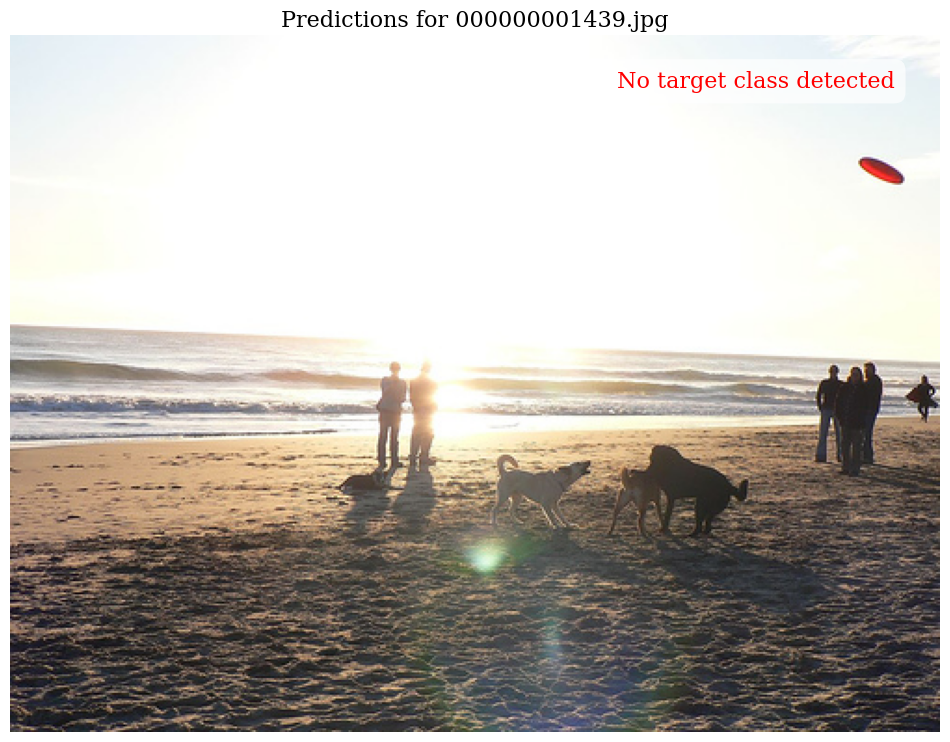

In [ ]:
"""
This script demonstrates inference with a fine-tuned Faster R-CNN model
for object detection. It includes model loading, transformation definition,
and visualization of predictions.
"""

# --- Standard Library Imports ---
import os
import random
import sys # Import sys for potential exit handling

# --- Third-Party Imports ---
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from PIL import Image
from google.colab import drive # For Google Drive mounting
from torchvision.models.detection import (
    FasterRCNN_ResNet50_FPN_V2_Weights,
    fasterrcnn_resnet50_fpn_v2
)
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.transforms import v2 as T
import torchvision.transforms.functional as F_vision


# --- Configuration ---
# Max line length for PEP 8 compliance.
MAX_LINE_LENGTH = 72


# --- 1. Mount Google Drive ---
# Mounts the Google Drive to access model checkpoints and images.
print("--- 1. Mounting Google Drive ---")
try:
    drive.mount('/content/drive')
    print("Google Drive mounted successfully.")
except Exception as e:
    print(f"Error mounting Google Drive: {e}")
    sys.exit(1) # Exit if drive cannot be mounted


# --- 2. Device Setup ---
# Determines whether to use GPU (CUDA) or CPU for model inference.
print("\n--- 2. Device Setup ---")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


# --- 3. Model Architecture Definition ---
# This function defines the Faster R-CNN model architecture.
# It MUST be IDENTICAL to the one used during your training phase
# to ensure compatibility with your saved checkpoint.
#
# IMPORTANT: NUM_CLASSES should be (number of your custom object
# classes) + 1 (for the background class).
# Example: If you trained on 'dog', 'car', 'cake', 'person' (4
# classes), NUM_CLASSES should be 5.
NUM_CLASSES = 5  # <-- ADJUST THIS VALUE TO MATCH YOUR TRAINED MODEL!
# Your classes are: ['__background__', 'person', 'car', 'dog', 'cake']


def get_model_instance_segmentation(num_classes: int) -> torch.nn.Module:
    """
    Loads a pre-trained Faster R-CNN model and replaces its box
    predictor head for custom class detection.

    Args:
        num_classes (int): The total number of classes (including
                           background).

    Returns:
        torch.nn.Module: The configured Faster R-CNN model.
    """
    print(f"\n--- 3. Model Architecture Definition ---")
    print("Loading pre-trained Faster R-CNN with ResNet50-FPN V2 "
          "backbone...")
    model = fasterrcnn_resnet50_fpn_v2(
        weights=FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
    )

    # Get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features

    # Replace the pre-trained box predictor head with a new one
    # for your custom classes.
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features,
                                                      num_classes)

    print(f"Model's box predictor head replaced for {num_classes} "
          "classes.")
    return model


# --- 4. Instantiate Model and Load Checkpoint ---
# Creates an instance of the model and loads the trained weights.
print("\n--- 4. Instantiate Model and Load Checkpoint ---")

# Specify the exact path to your saved model checkpoint file.
MODEL_PATH = os.path.join(
    '/content/drive/MyDrive',
    'faster_rcnn_checkpoint_7.pth'
)  # <--- CONFIRM THIS PATH!

# Create an instance of your model architecture.
model = get_model_instance_segmentation(NUM_CLASSES)

# Load the saved state_dict.
# It handles checkpoints that save additional metadata ('model_state_dict')
# or raw state_dicts.
try:
    checkpoint = torch.load(MODEL_PATH, map_location=device,
                            weights_only=False)
    if 'model_state_dict' in checkpoint:
        model.load_state_dict(checkpoint['model_state_dict'])
        print("Loaded model state_dict from 'model_state_dict' key.")
    else:
        model.load_state_dict(checkpoint) # Load directly if no key
        print("Loaded model state_dict directly from checkpoint file.")
except FileNotFoundError:
    print(f"Error: Model checkpoint not found at {MODEL_PATH}")
    sys.exit(1)
except Exception as e:
    print(f"An error occurred while loading the model: {e}")
    print("Please ensure the model_path is correct and the file is "
          "not corrupted.")
    sys.exit(1)

# Set the model to evaluation mode. This disables dropout and ensures
# batch normalization layers use their learned statistics. Crucial
# for consistent inference.
model.eval()
model.to(device)

print(f"Model loaded successfully from {MODEL_PATH} and set to "
      "evaluation mode.")


# --- 5. Define Transforms for Inference ---
# These transformations should match the *validation/test* transforms
# used during your training.
def get_transform(train: bool) -> T.Compose:
    """
    Defines image transformations for inference.

    Args:
        train (bool): Flag indicating if transforms are for training
                      (not used for inference, but kept for signature
                      consistency).

    Returns:
        torch.nn.Module: A Compose object of transformations.
    """
    # For inference, we typically only need to convert to tensor and
    # normalize.
    _ = train # Suppress unused variable warning
    return T.Compose([
        T.PILToTensor(),  # Converts PIL Image to torch.uint8 Tensor
        # Converts tensor to float and scales to [0, 1]
        T.ToDtype(torch.float32, scale=True)
    ])


# --- 6. Define Class Names ---
# This list MUST match the order of your classes as they were indexed
# during your dataset creation/training.
# "__background__" is always at index 0.
print("\n--- 6. Define Class Names ---")
TARGET_CLASSES = ['__background__', 'person', 'car', 'dog', 'cake']

# Creates a mapping from numerical label IDs back to human-readable names.
REVERSE_CATEGORY_MAP = {i: name for i, name in enumerate(TARGET_CLASSES)}
print(f"Target classes defined: {TARGET_CLASSES}")


# --- 7. Prediction Function and Visualization ---
def get_random_color() -> tuple:
    """Generates a random RGB color tuple."""
    return (random.random(), random.random(), random.random())


def visualize_prediction(image_path: str, model: torch.nn.Module,
                         transform: T.Compose,
                         confidence_threshold: float = 0.30) -> None:
    """
    Performs object detection prediction on an image and visualizes
    the results.

    Args:
        image_path (str): The file path to the input image.
        model (torch.nn.Module): The loaded object detection model.
        transform (T.Compose): Image transformation pipeline.
        confidence_threshold (float): Minimum confidence score to
                                      display a detection.
    """
    original_image = Image.open(image_path).convert("RGB")
    image_tensor = transform(original_image)

    # Add batch dimension and move to device
    image_tensor = image_tensor.unsqueeze(0).to(device)

    with torch.no_grad():
        prediction = model(image_tensor)

    pred = prediction[0]

    print("\n--- Raw Model Prediction Output (before filtering) ---")
    print(f"Number of raw detections: {len(pred['scores'])}")
    if len(pred['scores']) > 0:
        # Print top N scores and their corresponding labels
        num_to_print = min(10, len(pred['scores']))
        print(f"Top {num_to_print} scores: "
              f"{pred['scores'][:num_to_print].cpu().numpy()}")
        print(f"Corresponding labels: "
              f"{pred['labels'][:num_to_print].cpu().numpy()}")
        print(f"Sample boxes (first {num_to_print}):\n"
              f"{pred['boxes'][:num_to_print].cpu().numpy()}")
    else:
        print("No raw detections were made by the model.")
    print("----------------------------------------------------\n")

    boxes = pred['boxes'].cpu().numpy()
    labels = pred['labels'].cpu().numpy()
    scores = pred['scores'].cpu().numpy()

    # Filter predictions based on a confidence threshold.
    keep = scores > confidence_threshold
    boxes = boxes[keep]
    labels = labels[keep]
    scores = scores[keep]

    # Prepare image for display
    display_image_pil = F_vision.to_pil_image(image_tensor.squeeze(0).cpu())
    display_image_np = np.array(display_image_pil)

    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.imshow(display_image_pil)
    ax.set_autoscale_on(False)

    if len(boxes) == 0:
        img_height, img_width = (display_image_np.shape[0],
                                 display_image_np.shape[1])
        ax.text(img_width * 0.95, img_height * 0.05,
                'No target class detected',
                color='red', fontsize=16, ha='right', va='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none',
                          boxstyle='round,pad=0.5'))
    else:
        for i in range(len(boxes)):
            box = boxes[i]
            label = labels[i]
            score = scores[i]

            # Draw the bounding box rectangle.
            xmin, ymin, xmax, ymax = box
            rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                     linewidth=2, edgecolor='r',
                                     facecolor='none')
            ax.add_patch(rect)

            # Get the human-readable class name.
            class_name = REVERSE_CATEGORY_MAP.get(label, f'Unknown-{label}')

            # Add text label (class name and confidence score).
            ax.text(xmin, ymin - 10, f'{class_name}: {score:.2f}',
                    bbox=dict(facecolor='red', alpha=0.5), fontsize=10,
                    color='white')

    ax.set_title(f'Predictions for {os.path.basename(image_path)}')
    plt.axis('off')
    plt.show()


# --- 8. Specify Test Image and Perform Prediction ---
print("\n--- 8. Specify Test Image and Perform Prediction ---")
# This path should be correct and accessible in your Google Drive.
TEST_IMAGE_PATH = os.path.join(
    '/content/drive/MyDrive',
    'coco2017', 'test-30', '000000001439.jpg'
)

print(f"Performing prediction on: {TEST_IMAGE_PATH}")
# Call the visualization function with a chosen confidence threshold.
visualize_prediction(TEST_IMAGE_PATH, model, get_transform(train=False),
                     confidence_threshold=0.55)